## Importig Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
app=pd.read_csv('application_data.csv')
prev_app=pd.read_csv('previous_application.csv')

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Feature Selection

In [4]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app.shape

(307511, 122)

In [6]:
app.isnull().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [7]:
msng_info=pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_info

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [8]:
msng_info['msng_pct']=msng_info['null_count']/app.shape[0]*100
msng_info

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
5,REG_CITY_NOT_WORK_CITY,0,0.000000
6,LIVE_CITY_NOT_WORK_CITY,0,0.000000
7,ORGANIZATION_TYPE,0,0.000000
8,FLAG_DOCUMENT_21,0,0.000000
9,FLAG_DOCUMENT_20,0,0.000000


In [9]:
msng_info.to_excel('missing_info.xlsx',index=False)

In [10]:
msng_col=msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
msng_col
len(msng_col)

49

In [11]:
app_msng_rmvd=app.drop(labels=msng_col,axis=1)

In [12]:
app_msng_rmvd.shape

(307511, 73)

In [13]:
app_msng_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\2063031901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_tgt_col['TARGET'] = flag_tgt_col['TARGET'].astype(str)


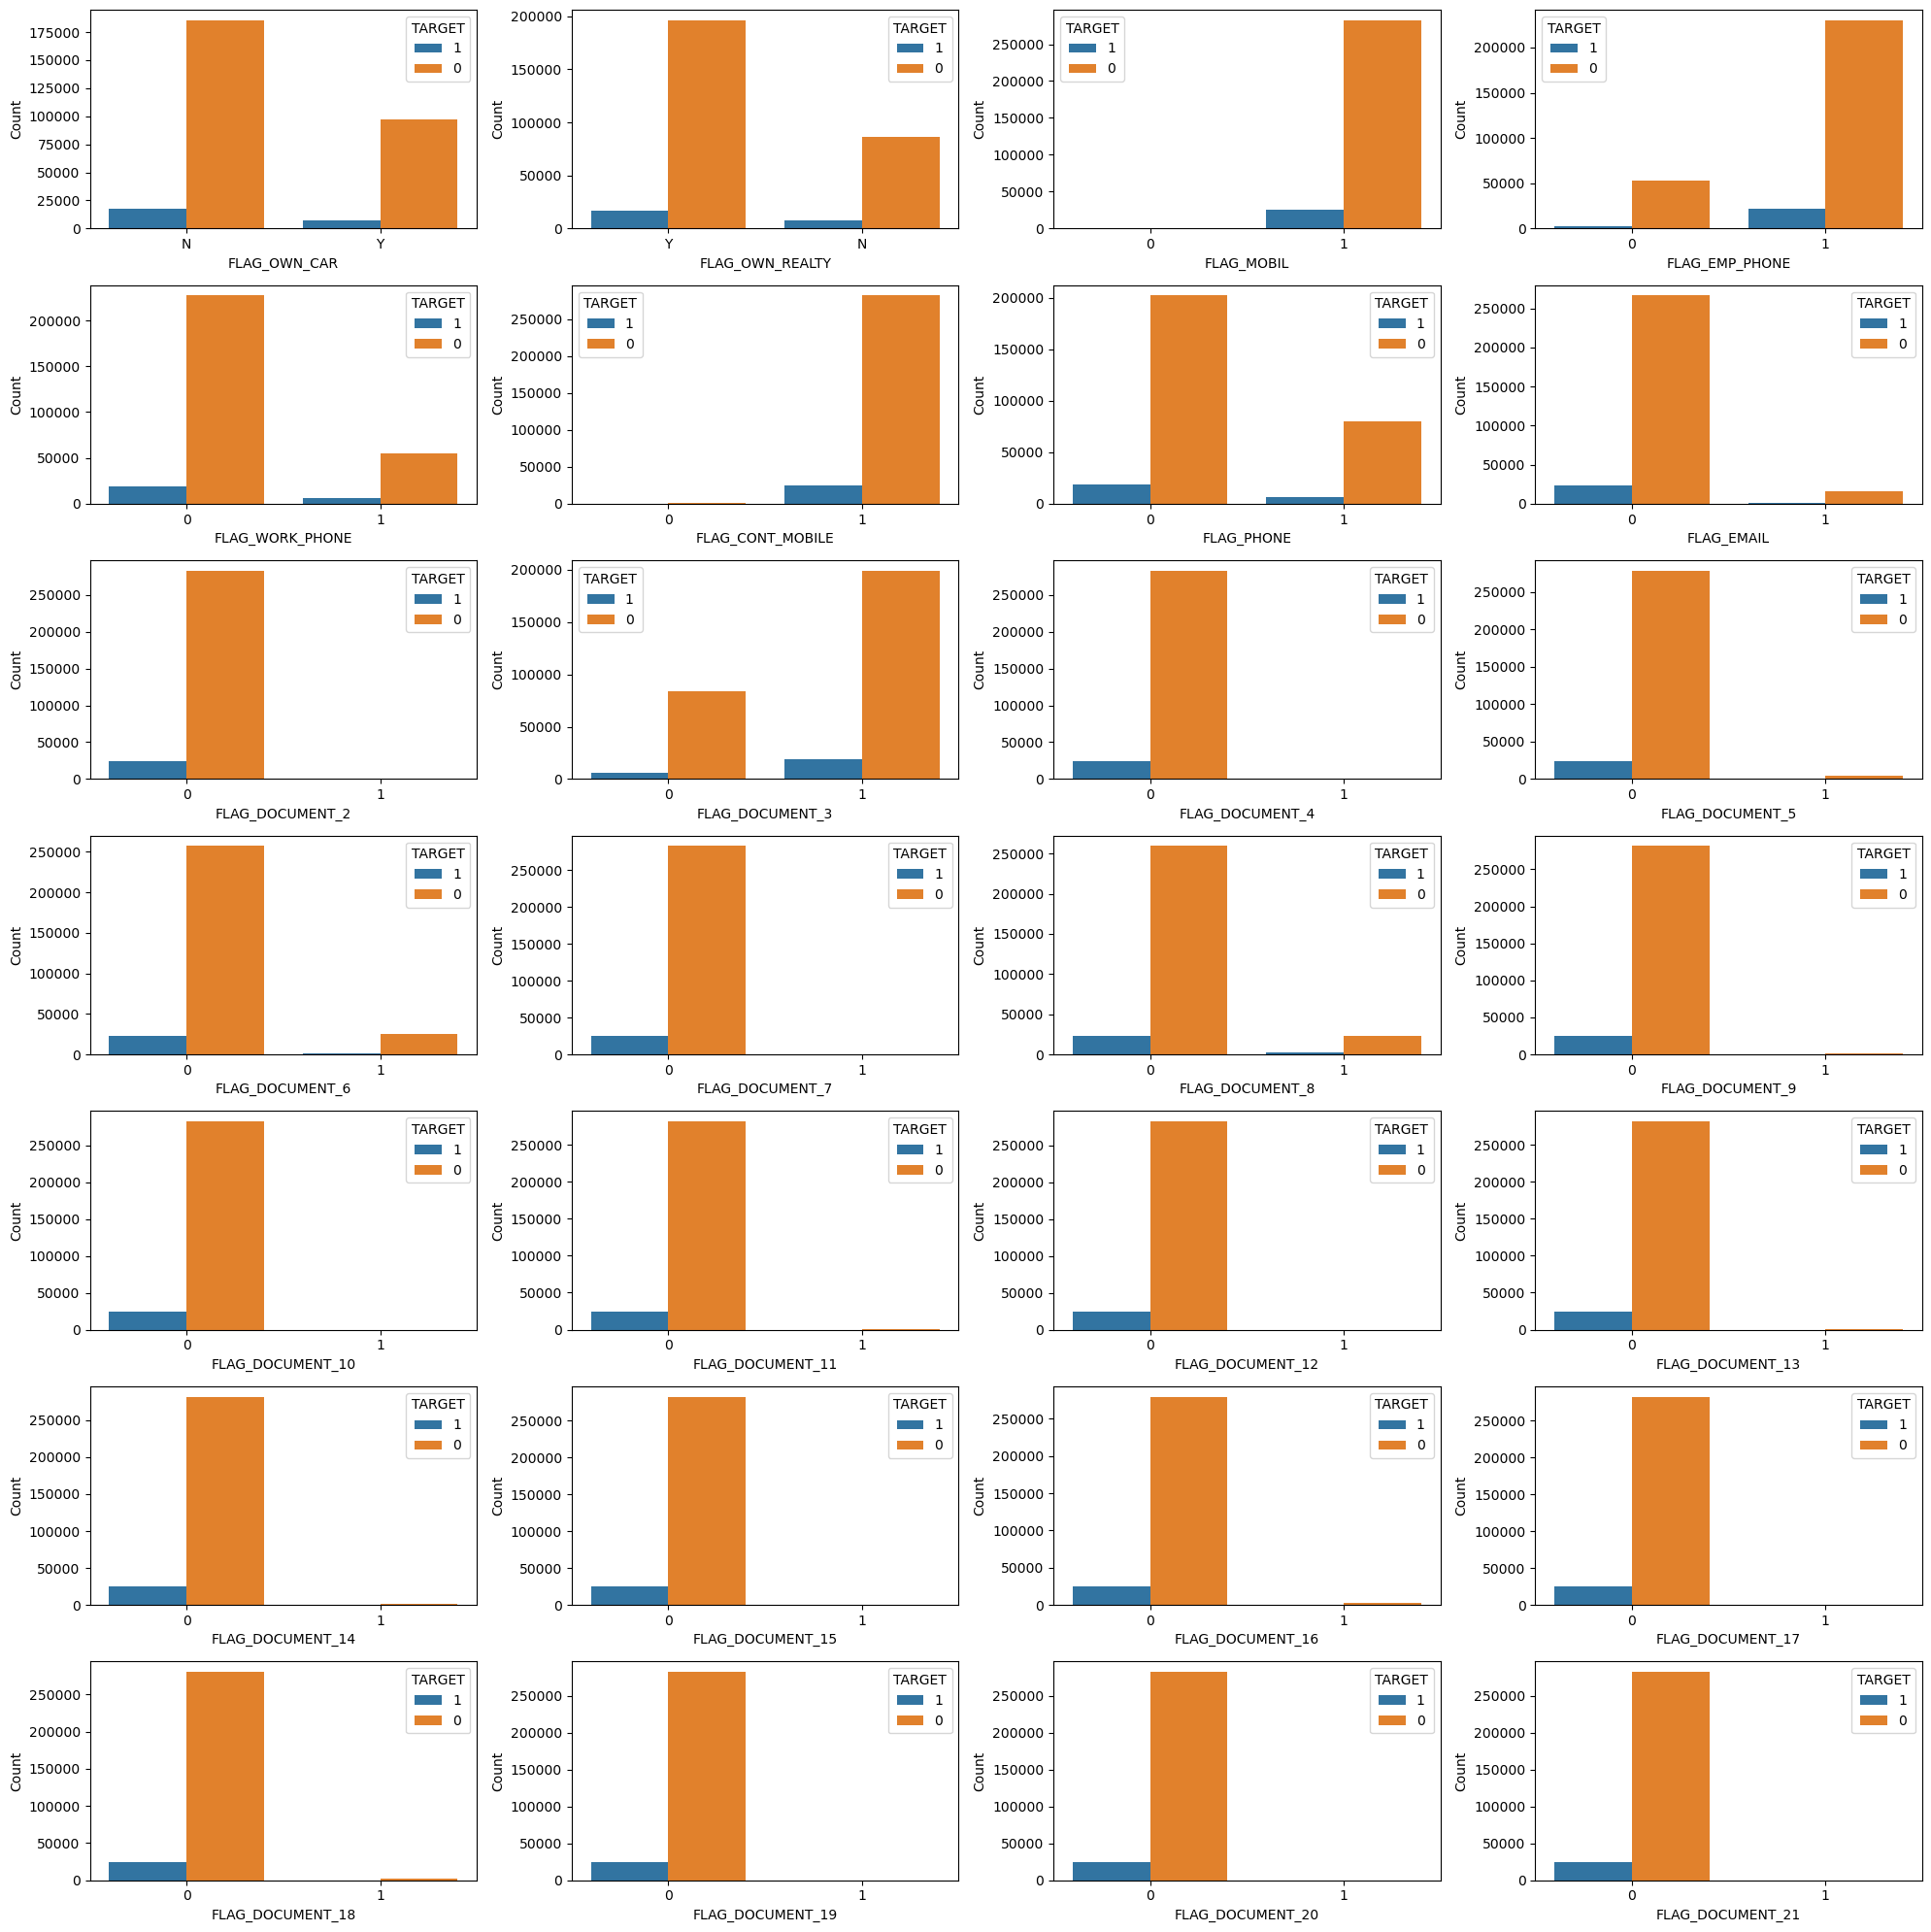

In [14]:
# Using list comprehension to get flag_col
flag_col = [col for col in app_msng_rmvd.columns if col.startswith("FLAG_")]
flag_tgt_col = app_msng_rmvd[flag_col+['TARGET']]
# Ensure the 'TARGET' column is of type string
flag_tgt_col['TARGET'] = flag_tgt_col['TARGET'].astype(str)

plt.figure(figsize=(20, 20))
for i, col in enumerate(flag_col):
    plt.subplot(7, 4, i + 1)
    sns.countplot(data=flag_tgt_col, x=col, hue='TARGET')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='TARGET')

plt.tight_layout()
plt.show()

In [15]:
flag_corr=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
    'FLAG_EMAIL','TARGET']
flag_corr_df=app_msng_rmvd[flag_corr]
flag_corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [16]:
flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY']=flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\1768161448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\1768161448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY']=flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


In [17]:
corr_df=round(flag_corr_df.corr(),2)
corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_OWN_CAR,1.00,-0.00,-0.0,0.15,0.01,-0.01,-0.01,0.03,-0.02
FLAG_OWN_REALTY,-0.00,1.00,-0.0,-0.07,-0.11,0.01,-0.04,0.03,-0.01
FLAG_MOBIL,-0.00,-0.00,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,0.15,-0.07,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.01,-0.11,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.01,0.01,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,-0.01,-0.04,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.03,0.03,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,-0.02,-0.01,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


<Axes: >

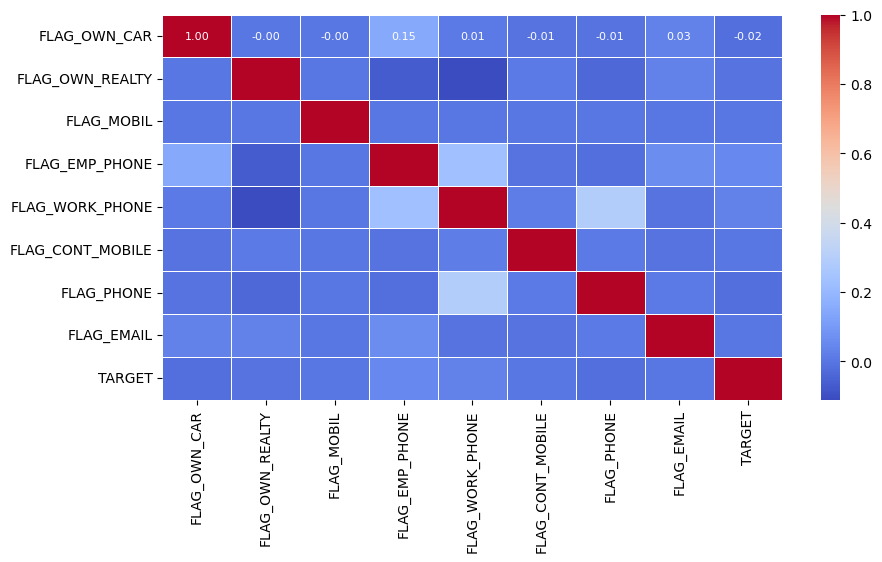

In [18]:
plt.figure(figsize=(10, 5))  
sns.heatmap(corr_df, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f", annot_kws={"size": 8})


In [19]:
app_flag_rmvd=app_msng_rmvd.drop(labels=flag_col,axis=1)

In [20]:
app_flag_rmvd.shape

(307511, 45)

In [21]:
app_flag_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2)

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.00,0.11,-0.16
EXT_SOURCE_3,0.11,1.00,-0.18
TARGET,-0.16,-0.18,1.00


<Axes: >

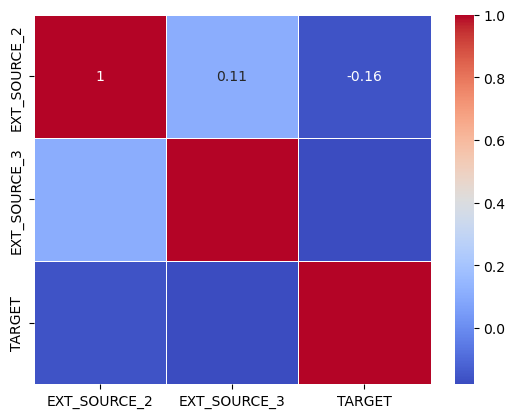

In [23]:
sns.heatmap(data=round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidth=0.5,annot=True)

In [24]:
app_score_col_rmvd=app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)

In [25]:
app_score_col_rmvd.shape

(307511, 43)

## Feature engineering

In [26]:
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


### Missing Imputations

In [27]:
app_score_col_rmvd.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [28]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [29]:
app_score_col_rmvd['CNT_FAM_MEMBERS']=app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna(app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0])

In [30]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [31]:
app_score_col_rmvd.groupby(['OCCUPATION_TYPE']).size().sort_values()

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
dtype: int64

In [32]:
app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [33]:
app_score_col_rmvd['OCCUPATION_TYPE']=app_score_col_rmvd['OCCUPATION_TYPE'].fillna(app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0])

In [34]:
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [35]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

1292

In [36]:
app_score_col_rmvd.groupby(['NAME_TYPE_SUITE']).size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64

In [37]:
app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [38]:
app_score_col_rmvd['NAME_TYPE_SUITE']=app_score_col_rmvd['NAME_TYPE_SUITE'].fillna(app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0])

In [39]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [40]:
app_score_col_rmvd['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [41]:
app_score_col_rmvd['AMT_ANNUITY']=app_score_col_rmvd['AMT_ANNUITY'].fillna(app_score_col_rmvd['AMT_ANNUITY'].mean())

In [42]:
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [43]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [44]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [45]:
amt_req_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [46]:
for col in amt_req_col:
    app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna((app_score_col_rmvd[col].median()))

In [47]:
app_score_col_rmvd.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [48]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [49]:
app_score_col_rmvd['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [50]:
app_score_col_rmvd['AMT_GOODS_PRICE']=app_score_col_rmvd['AMT_GOODS_PRICE'].fillna(app_score_col_rmvd['AMT_GOODS_PRICE'].median())


In [51]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Value Modification

In [52]:
days_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)

In [53]:
for col in days_col:
    app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])

In [54]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
app_score_col_rmvd.nunique().sort_values() #checking for binning variables

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

### Outliner detection and Treatment & Binning

In [56]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

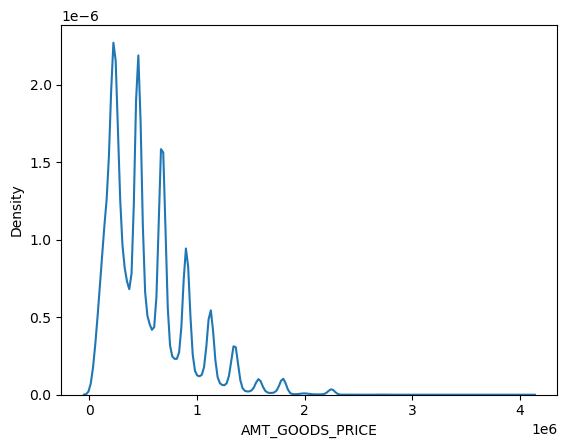

In [57]:
sns.kdeplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AMT_GOODS_PRICE'>

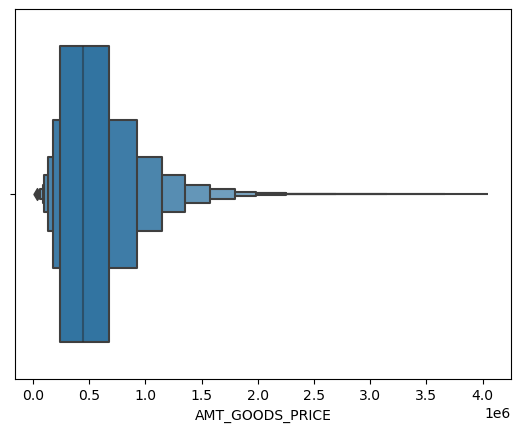

In [58]:
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

In [59]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [60]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [61]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\3225432597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()


AMT_GOODS_PRICE_RANGE
0-100K         8709
100k-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [62]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [63]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [64]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [65]:
app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\1909137384.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()


AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [66]:
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [67]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [68]:
app_score_col_rmvd['AMT_CREDIT'].max()

4050000.0

In [69]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [70]:
app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\4092090797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size()


AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [71]:
app_score_col_rmvd['AMT_CREDIT'].isnull().sum()

0

In [72]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [73]:
app_score_col_rmvd['AMT_ANNUITY'].max()

258025.5

In [74]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels=ranges)

In [75]:
app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\4067078387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()


AMT_ANNUITY_RANGE
0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [76]:
app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [77]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [78]:
app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [79]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED']<app_score_col_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [80]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)

In [81]:
app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\681948328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()


DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Above 65Y     55374
dtype: int64

In [82]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [83]:
app_score_col_rmvd['DAYS_BIRTH'].min()

7489

In [84]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_score_col_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [85]:
app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\3707552931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()


DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

# Data Analysis

In [86]:
app_score_col_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [87]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [88]:
app_score_col_rmvd.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [89]:
obj_var=app_score_col_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [90]:
app_score_col_rmvd.groupby('NAME_CONTRACT_TYPE').size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [91]:
app_score_col_rmvd['TARGET'] = app_score_col_rmvd['TARGET'].astype(str)

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

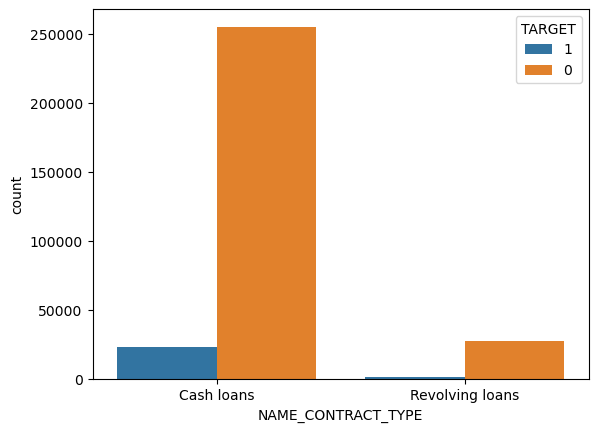

In [92]:
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [93]:
app_score_col_rmvd.groupby('NAME_CONTRACT_TYPE').size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [94]:
total_dflt_cash=(app_score_col_rmvd['NAME_CONTRACT_TYPE'] == 'Cash loans').sum()
total_dflt_rev=(app_score_col_rmvd['NAME_CONTRACT_TYPE'] == 'Revolving loans').sum()
total_dflt_cash


278232

In [95]:
count_dflt_cash = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_CONTRACT_TYPE'] == 'Cash loans')).sum()
count_dflt_rev = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_CONTRACT_TYPE'] == 'Revolving loans')).sum()
data_pct = pd.DataFrame({'Loan Type': ['Cash loans', 'Revolving loans'],
                         'Default Count': [count_dflt_cash, count_dflt_rev],
                        'Percent':[count_dflt_cash/total_dflt_cash*100,count_dflt_rev/total_dflt_rev*100]})
data_pct

,Loan Type,Default Count,Percent
0,Cash loans,23221,8.345913
1,Revolving loans,1604,5.478329


Text(0.5, 1.0, 'Percent of customers who are defaulter in a given loan category')

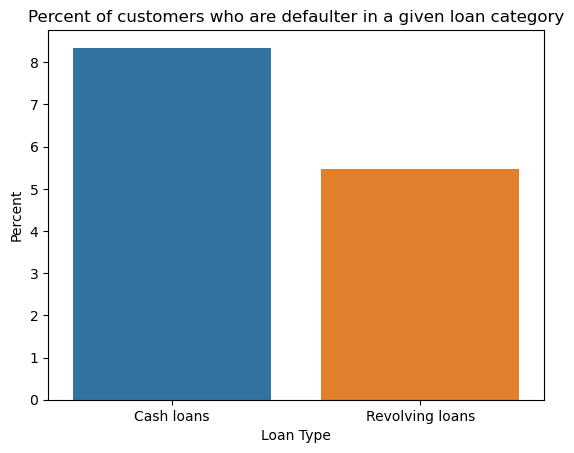

In [96]:
sns.barplot(data=data_pct,x='Loan Type',y='Percent')
plt.title('Percent of customers who are defaulter in a given loan category')

<Axes: xlabel='Loan Type', ylabel='Percent'>

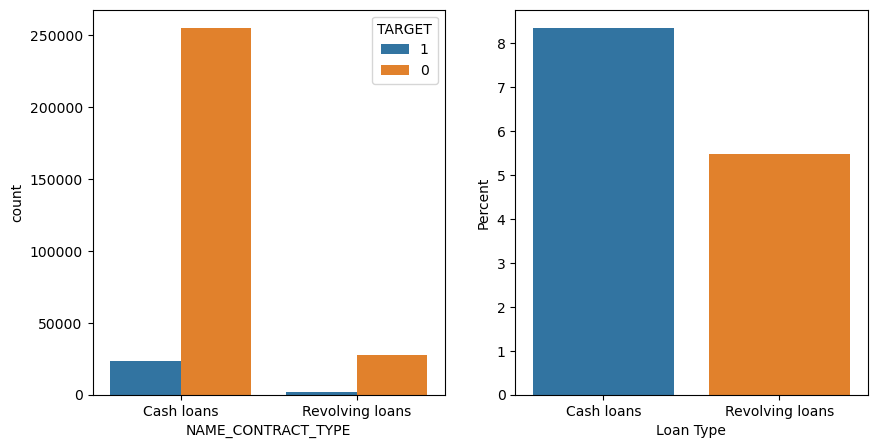

In [97]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='Loan Type',y='Percent')

From above graphs it is clear that most of the customers have taken cash loan and customers who have taken cash loan are less likely to default

In [98]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

<Axes: xlabel='CODE_GENDER', ylabel='count'>

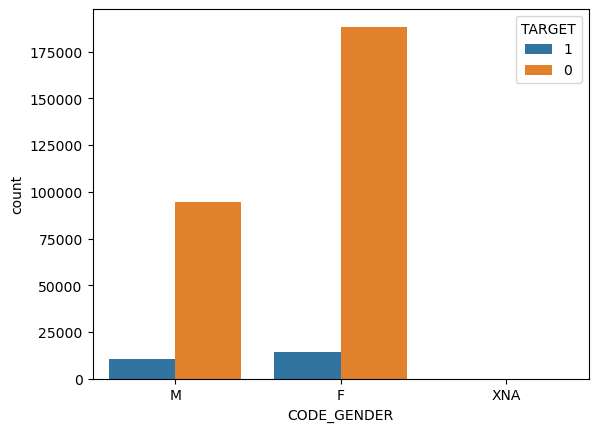

In [99]:
sns.countplot(data=app_score_col_rmvd,x='CODE_GENDER',hue='TARGET')

In [100]:
app_score_col_rmvd.groupby('CODE_GENDER').size()

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64

In [101]:
total_F=(app_score_col_rmvd['CODE_GENDER'] == 'F').sum()
total_M=(app_score_col_rmvd['CODE_GENDER'] == 'M').sum()
count_F = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['CODE_GENDER'] == 'F')).sum()
count_M = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['CODE_GENDER'] == 'M')).sum()
data_pct_gen = pd.DataFrame({'Gender': ['Female', 'Male'],
                         'Default Count': [count_F, count_M],
                        'Percent':[count_F/total_F*100,count_M/total_M*100]})
data_pct_gen

,Gender,Default Count,Percent
0,Female,14170,6.999328
1,Male,10655,10.141920


<Axes: xlabel='Gender', ylabel='Percent'>

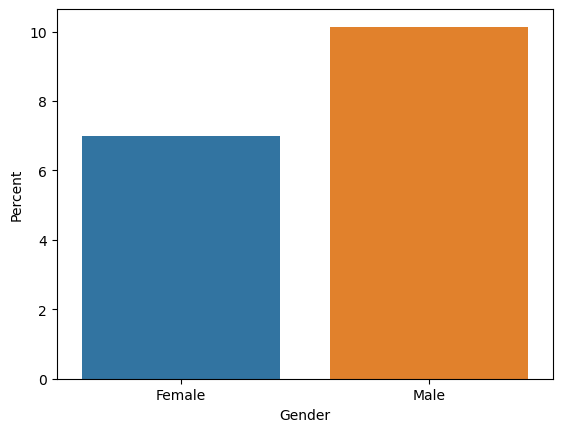

In [102]:
sns.barplot(data=data_pct_gen,x='Gender',y='Percent')

<Axes: xlabel='Gender', ylabel='Percent'>

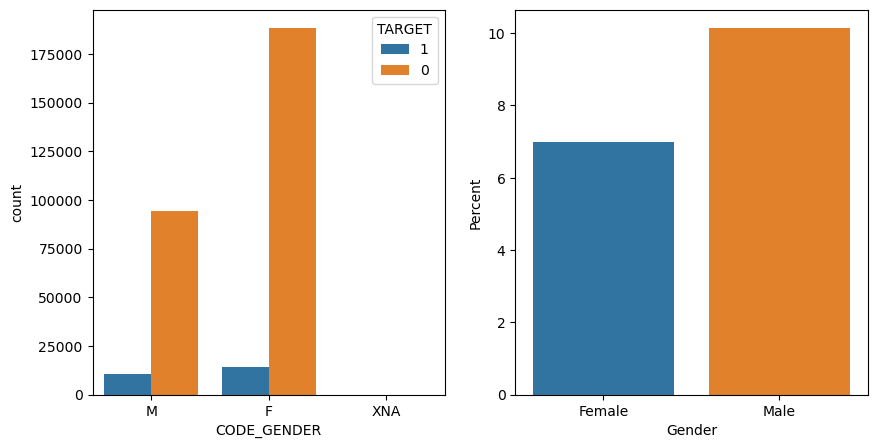

In [103]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='CODE_GENDER',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct_gen,x='Gender',y='Percent')

Most of the loan is taken by female and defaulter rate of females are just 7 % which is safer and lesser than male.

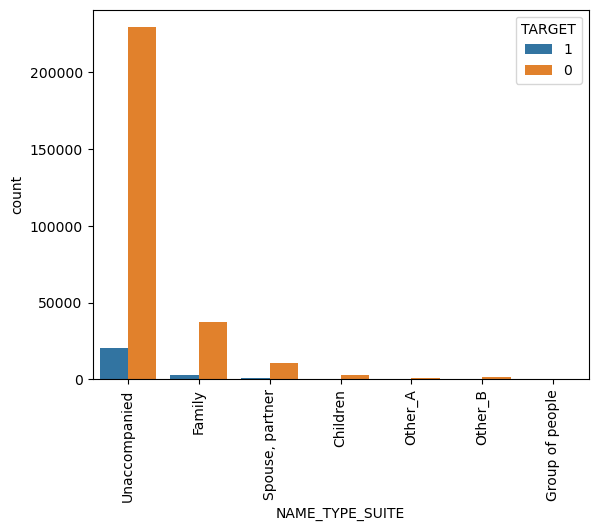

In [104]:
sns.countplot(data=app_score_col_rmvd,x='NAME_TYPE_SUITE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [105]:
app_score_col_rmvd.groupby('NAME_TYPE_SUITE').size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      249818
dtype: int64

In [106]:
total_c=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Children').sum()
total_f=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Family').sum()
total_g=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Group of people').sum()
total_A=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Other_A').sum()
total_B=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Other_B').sum()
total_s=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Spouse, partner').sum()
total_u=(app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Unaccompanied').sum()
count_c = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Children')).sum()
count_f = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Family')).sum()
count_g = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Group of people')).sum()
count_A = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Other_A')).sum()
count_B = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Other_B')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Spouse, partner')).sum()
count_u = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_TYPE_SUITE'] == 'Unaccompanied')).sum()
data_pct_name = pd.DataFrame({'Name_type_suite': ['Children', 'Family','Group of prople','Other_A','Other_B','Spouse, partner','Unaccompanied'],
                         'Default Count': [count_c,count_f,count_g,count_A,count_B,count_s,count_u],
                        'Percent':[count_c/total_c*100,count_f/total_f*100,count_g/total_g*100,count_A/total_A*100,count_B/total_B*100,count_s/total_s*100,count_u/total_u*100]})
data_pct_name

,Name_type_suite,Default Count,Percent
0,Children,241,7.376798
1,Family,3009,7.494583
2,Group of prople,23,8.487085
3,Other_A,76,8.775982
4,Other_B,174,9.830508
5,"Spouse, partner",895,7.871592
6,Unaccompanied,20407,8.168747


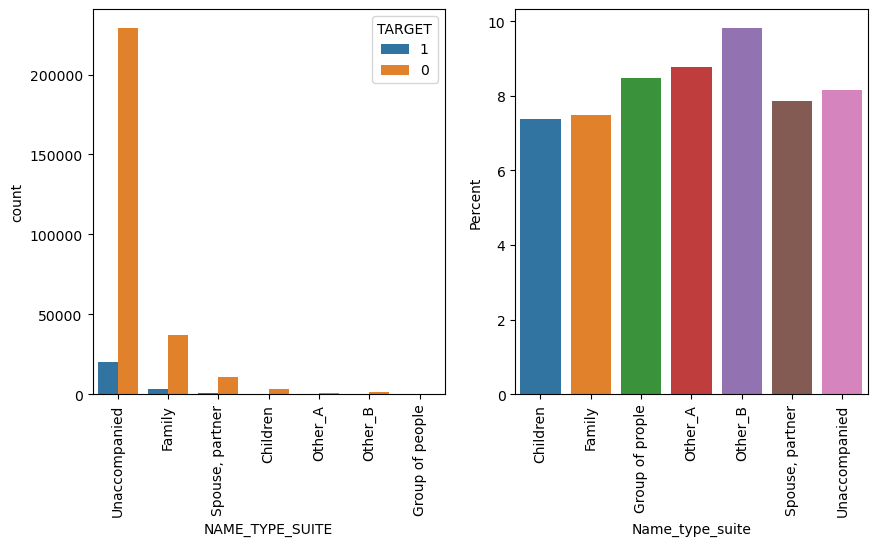

In [107]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_TYPE_SUITE',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_name,x='Name_type_suite',y='Percent')
plt.xticks(rotation=90)

plt.show()

Unaccompanied people have taken maximun no. loans and default rate is ~8.5% which is still safer.

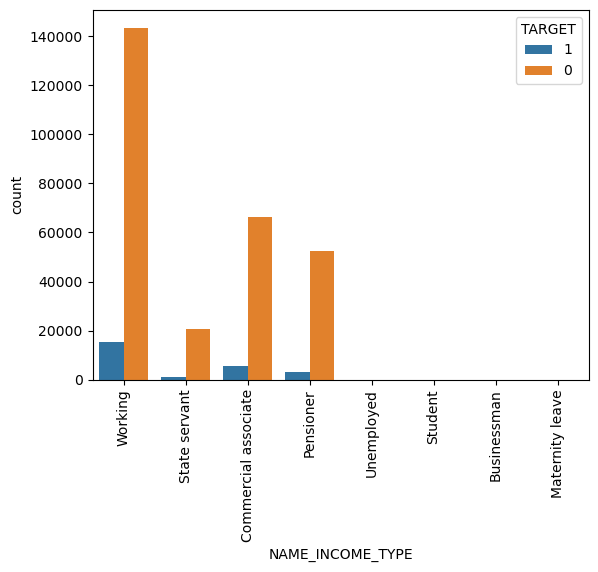

In [108]:
sns.countplot(data=app_score_col_rmvd,x='NAME_INCOME_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [109]:
app_score_col_rmvd.groupby('NAME_INCOME_TYPE').size()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
dtype: int64

In [110]:
total_b=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Businessman').sum()
total_c=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Commercial associate').sum()
total_m=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Maternity leave').sum()
total_p=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Pensioner').sum()
total_st=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'State servant').sum()
total_s=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Student').sum()
total_u=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Unemployed').sum()
total_w=(app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Working').sum()
count_b = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Businessman')).sum()
count_c = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Commercial associate')).sum()
count_m = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Maternity leave')).sum()
count_p = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Pensioner')).sum()
count_st = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'State servant')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Student')).sum()
count_u = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Unemployed')).sum()
count_w = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_INCOME_TYPE'] == 'Working')).sum()
data_pct_income = pd.DataFrame({'Income type': ['Businessman', 'Commercial associate','Maternity leave','Pensioner','State servant','Student','Unemployed','Working'],
                         'Default Count': [count_b,count_c,count_m,count_p,count_st,count_s,count_u,count_w],
                        'Percent':[count_b/total_b*100,count_c/total_c*100,count_m/total_m*100,count_p/total_p*100,count_st/total_st*100,count_s/total_s*100,count_u/total_u*100,count_w/total_w*100]})
data_pct_income

,Income type,Default Count,Percent
0,Businessman,0,0.000000
1,Commercial associate,5360,7.484257
2,Maternity leave,2,40.000000
3,Pensioner,2982,5.386366
4,State servant,1249,5.754965
5,Student,0,0.000000
6,Unemployed,8,36.363636
7,Working,15224,9.588472


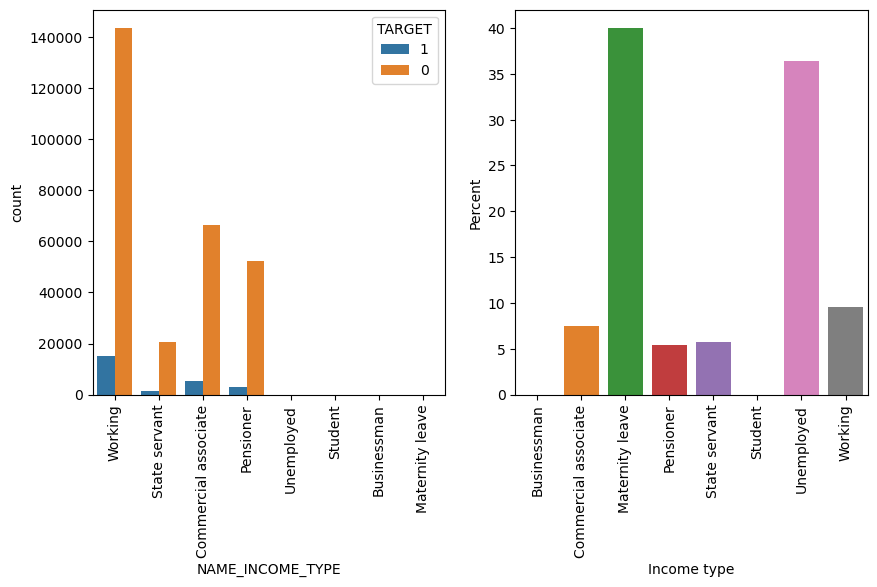

In [111]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_INCOME_TYPE',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_income,x='Income type',y='Percent')
plt.xticks(rotation=90)

plt.show()

The safest segments are worki,commercial associates and Pensioners.

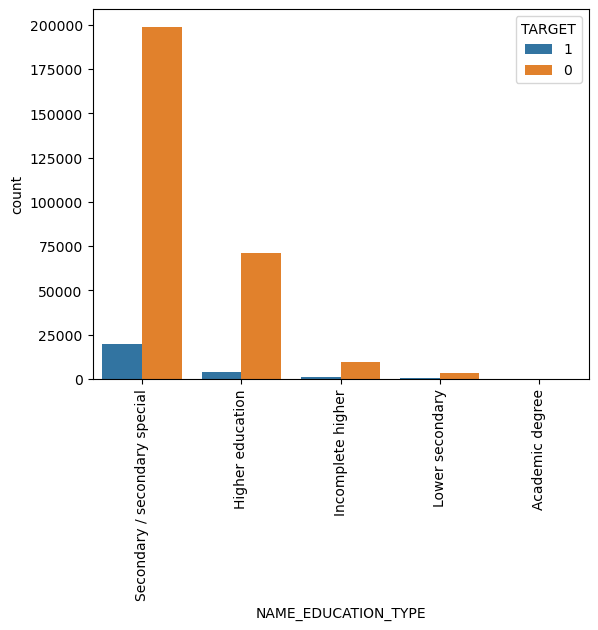

In [112]:
sns.countplot(data=app_score_col_rmvd,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [113]:
app_score_col_rmvd.groupby('NAME_EDUCATION_TYPE').size()

NAME_EDUCATION_TYPE
Academic degree                     164
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Secondary / secondary special    218391
dtype: int64

In [114]:
total_a=(app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Academic degree').sum()
total_h=(app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Higher education').sum()
total_i=(app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Incomplete higher').sum()
total_l=(app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Lower secondary').sum()
total_s=(app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special').sum()

count_a = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Academic degree')).sum()
count_h = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Higher education')).sum()
count_i = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Incomplete higher')).sum()
count_l = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Lower secondary')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special')).sum()

data_pct_education = pd.DataFrame({'Education Type': ['Academic degree', 'Higher education','Incomplete higher','Lower secondary','Secondary / secondary special'],
                         'Default Count': [count_a,count_h,count_i,count_l,count_s],
                        'Percent':[count_a/total_a*100,count_h/total_h*100,count_i/total_i*100,count_l/total_l*100,count_s/total_s*100]})
data_pct_education

,Education Type,Default Count,Percent
0,Academic degree,3,1.829268
1,Higher education,4009,5.355115
2,Incomplete higher,872,8.484966
3,Lower secondary,417,10.927673
4,Secondary / secondary special,19524,8.939929


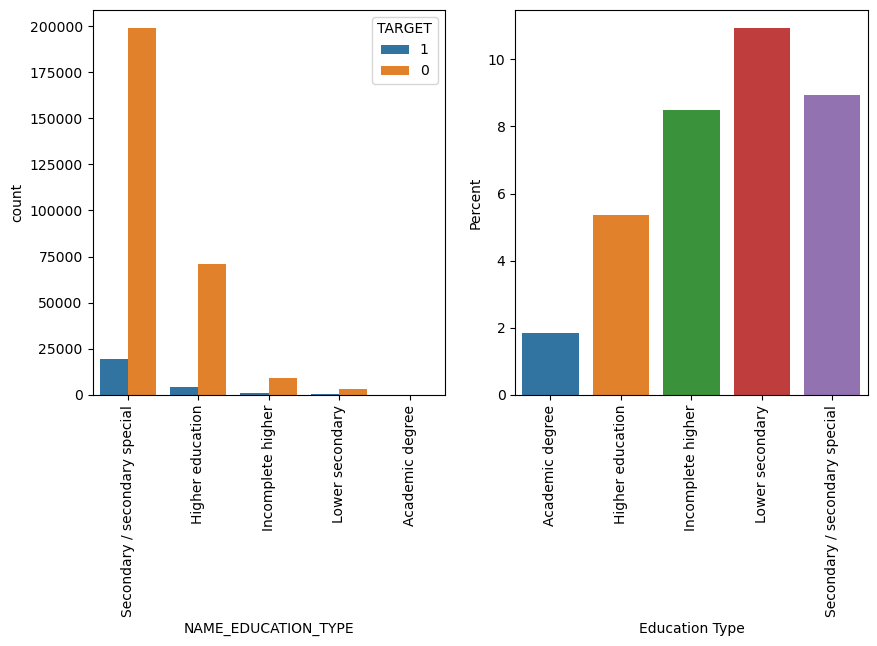

In [115]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_education,x='Education Type',y='Percent')
plt.xticks(rotation=90)

plt.show()

Higher education is the safest segment to give the loan with a default rate of less than 5%.

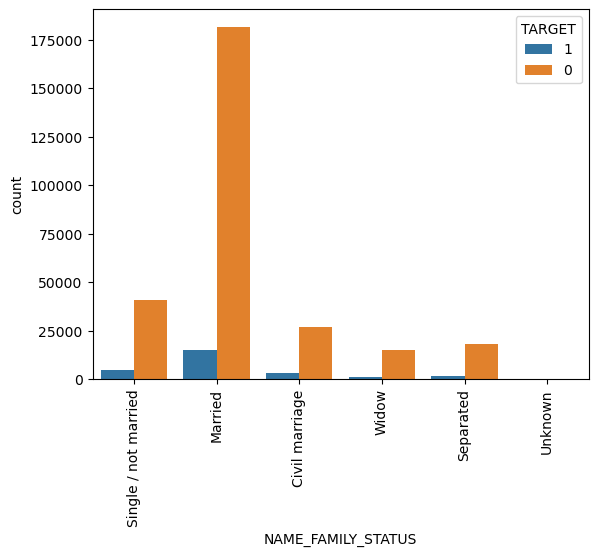

In [116]:
sns.countplot(data=app_score_col_rmvd,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [117]:
app_score_col_rmvd.groupby('NAME_FAMILY_STATUS').size()

NAME_FAMILY_STATUS
Civil marriage           29775
Married                 196432
Separated                19770
Single / not married     45444
Unknown                      2
Widow                    16088
dtype: int64

In [118]:
total_c=(app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Civil marriage').sum()
total_m=(app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Married').sum()
total_s=(app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Separated').sum()
total_sn=(app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Single / not married').sum()
total_u=(app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Unknown').sum()
total_w=(app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Widow').sum()

count_c = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Civil marriage')).sum()
count_m = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Married')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Separated')).sum()
count_sn = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Single / not married')).sum()
count_u = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Unknown')).sum()
count_w = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_FAMILY_STATUS'] == 'Widow')).sum()

data_pct_family = pd.DataFrame({'Family Status': ['Civil marriage', 'Married','Separated','Single / not married','Unknown','Widow'],
                         'Default Count': [count_c,count_m,count_s,count_sn,count_u,count_w],
                        'Percent':[count_c/total_c*100,count_m/total_m*100,count_s/total_s*100,count_sn/total_sn*100,count_u/total_u*100,count_w/total_w*100]})
data_pct_family

,Family Status,Default Count,Percent
0,Civil marriage,2961,9.944584
1,Married,14850,7.559868
2,Separated,1620,8.194234
3,Single / not married,4457,9.807675
4,Unknown,0,0.000000
5,Widow,937,5.824217


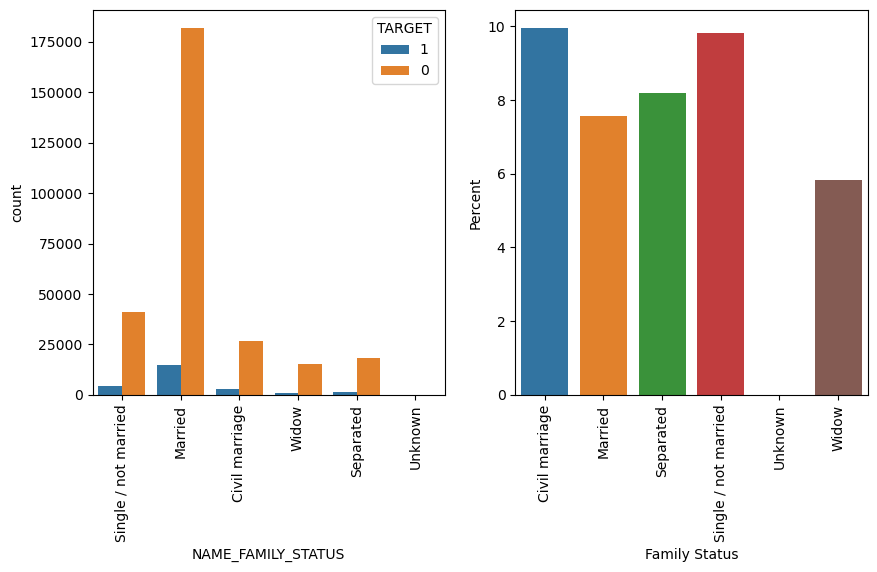

In [119]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_family,x='Family Status',y='Percent')
plt.xticks(rotation=90)

plt.show()

Married people are safe to target default rate is ~8%.

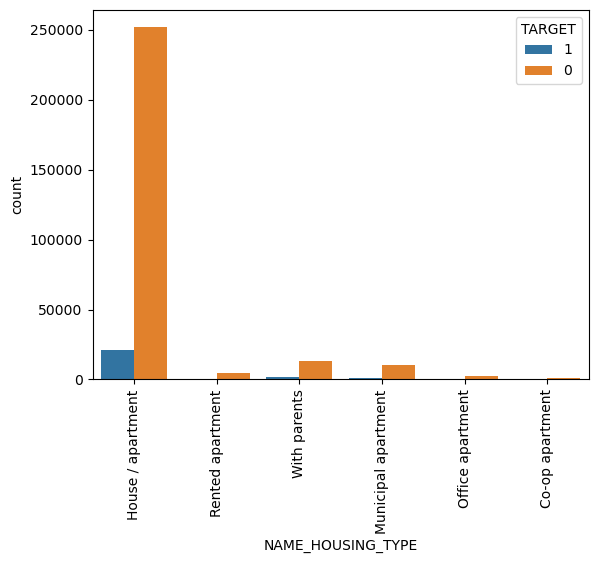

In [120]:
sns.countplot(data=app_score_col_rmvd,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [121]:
app_score_col_rmvd.groupby('NAME_HOUSING_TYPE').size()

NAME_HOUSING_TYPE
Co-op apartment          1122
House / apartment      272868
Municipal apartment     11183
Office apartment         2617
Rented apartment         4881
With parents            14840
dtype: int64

In [122]:
total_c=(app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Co-op apartment').sum()
total_h=(app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'House / apartment').sum()
total_m=(app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Municipal apartment').sum()
total_o=(app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Office apartment').sum()
total_r=(app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Rented apartment').sum()
total_w=(app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'With parents').sum()

count_c = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Co-op apartment')).sum()
count_h = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'House / apartment')).sum()
count_m = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Municipal apartment')).sum()
count_o = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Office apartment')).sum()
count_r = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'Rented apartment')).sum()
count_w = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['NAME_HOUSING_TYPE'] == 'With parents')).sum()

data_pct_housing = pd.DataFrame({'Housing Type': ['Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment','With parents'],
                         'Default Count': [count_c,count_h,count_m,count_o,count_r,count_w],
                        'Percent':[count_c/total_c*100,count_h/total_h*100,count_m/total_m*100,count_o/total_o*100,count_r/total_r*100,count_w/total_w*100]})
data_pct_housing

,Housing Type,Default Count,Percent
0,Co-op apartment,89,7.932264
1,House / apartment,21272,7.795711
2,Municipal apartment,955,8.539748
3,Office apartment,172,6.572411
4,Rented apartment,601,12.313051
5,With parents,1736,11.698113


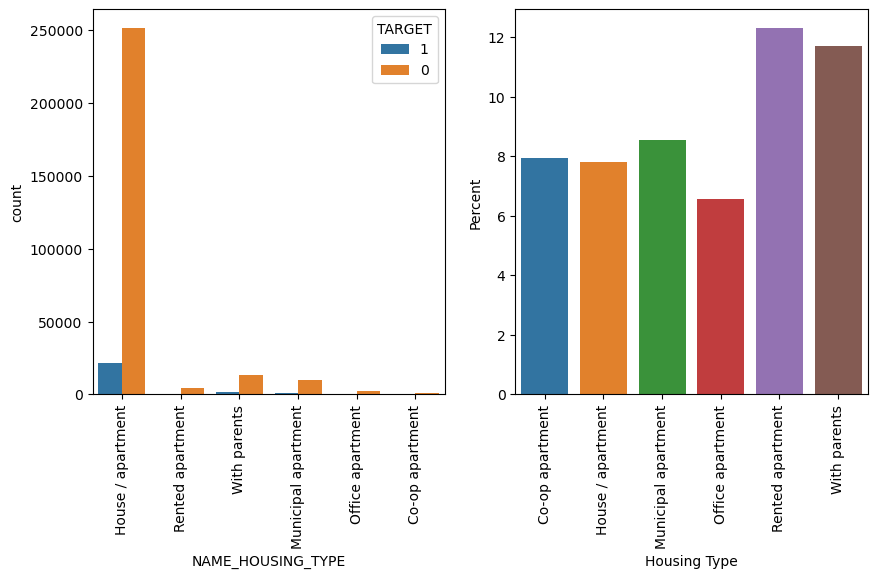

In [123]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_housing,x='Housing Type',y='Percent')
plt.xticks(rotation=90)

plt.show()

People having house/apartment are safe to give loan with default rate of ~8%/

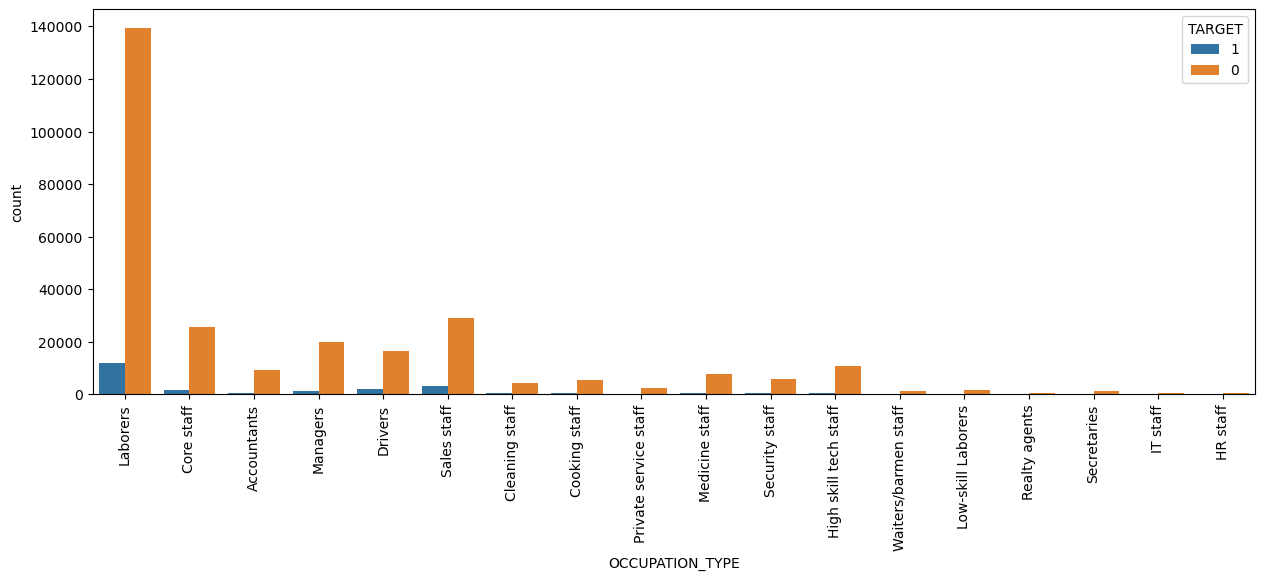

In [124]:
plt.figure(figsize=(15,5))
sns.countplot(data=app_score_col_rmvd,x='OCCUPATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [125]:
app_score_col_rmvd.groupby('OCCUPATION_TYPE').size()

OCCUPATION_TYPE
Accountants                9813
Cleaning staff             4653
Cooking staff              5946
Core staff                27570
Drivers                   18603
HR staff                    563
High skill tech staff     11380
IT staff                    526
Laborers                 151577
Low-skill Laborers         2093
Managers                  21371
Medicine staff             8537
Private service staff      2652
Realty agents               751
Sales staff               32102
Secretaries                1305
Security staff             6721
Waiters/barmen staff       1348
dtype: int64

In [126]:
total_l=(app_score_col_rmvd['OCCUPATION_TYPE'] == 'Laborers').sum()
total_s=(app_score_col_rmvd['OCCUPATION_TYPE'] == 'Sales staff').sum()
total_d=(app_score_col_rmvd['OCCUPATION_TYPE'] == 'Drivers').sum()
total_m=(app_score_col_rmvd['OCCUPATION_TYPE'] == 'Managers').sum()
total_c=(app_score_col_rmvd['OCCUPATION_TYPE'] == 'Core staff').sum()
total_a=(app_score_col_rmvd['OCCUPATION_TYPE'] == 'Accountants').sum()

count_l = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['OCCUPATION_TYPE'] == 'Laborers')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['OCCUPATION_TYPE'] == 'Sales staff')).sum()
count_d = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['OCCUPATION_TYPE'] == 'Drivers')).sum()
count_m = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['OCCUPATION_TYPE'] == 'Managers')).sum()
count_c = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['OCCUPATION_TYPE'] == 'Core staff')).sum()
count_a = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['OCCUPATION_TYPE'] == 'Accountants')).sum()

data_pct_occupation = pd.DataFrame({'Occupation Type': ['Laborers', 'Sales staff','Drivers','Managers','Core staff','Accountants'],
                         'Default Count': [count_l,count_s,count_d,count_m,count_c,count_a],
                        'Percent':[count_l/total_l*100,count_s/total_s*100,count_d/total_d*100,count_m/total_m*100,count_c/total_c*100,count_a/total_a*100]})
data_pct_occupation

,Occupation Type,Default Count,Percent
0,Laborers,12116,7.993297
1,Sales staff,3092,9.631799
2,Drivers,2107,11.326130
3,Managers,1328,6.214028
4,Core staff,1738,6.303954
5,Accountants,474,4.830327


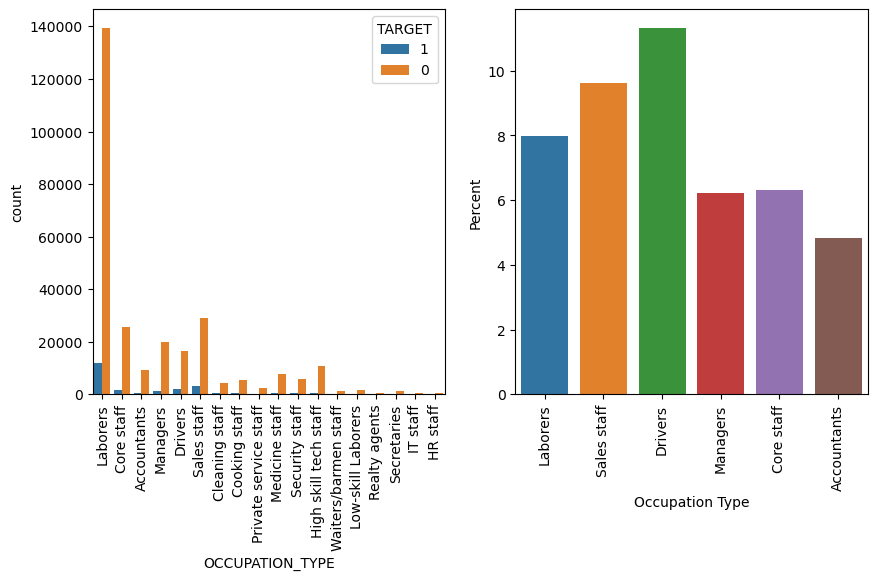

In [127]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='OCCUPATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_occupation,x='Occupation Type',y='Percent')
plt.xticks(rotation=90)

plt.show()

Drivers are most defaulters. Accountants are less defaulters. There shall be more default rated occupations but we have considered the occupation that has maximum no. of loans taken. Core staff, managers, laborers are safer to target with a default rate of <=8%.

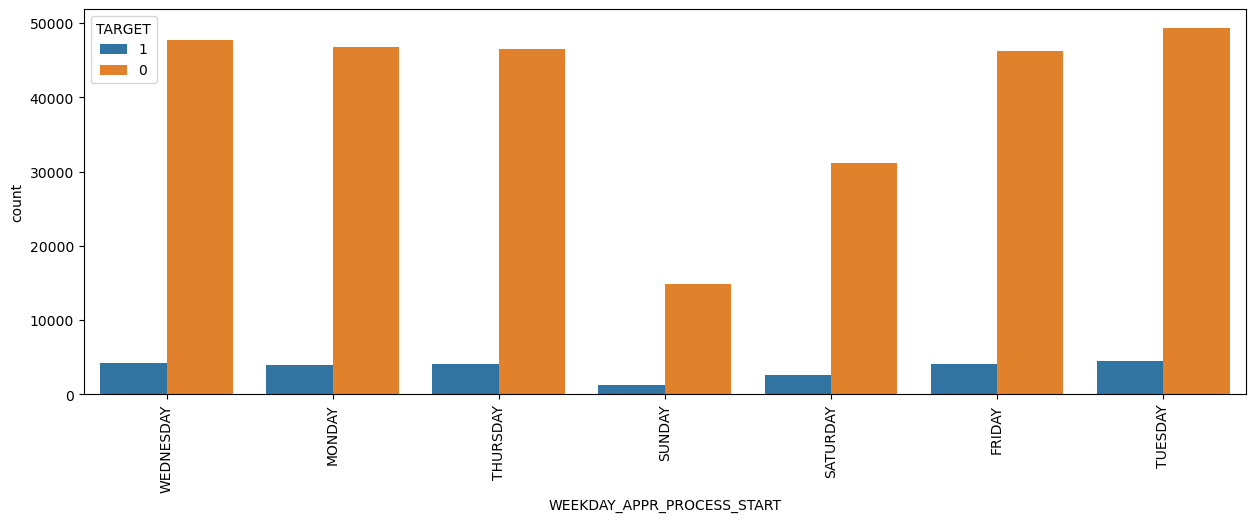

In [128]:
plt.figure(figsize=(15,5))
sns.countplot(data=app_score_col_rmvd,x='WEEKDAY_APPR_PROCESS_START',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [129]:
app_score_col_rmvd.groupby('WEEKDAY_APPR_PROCESS_START').size()

WEEKDAY_APPR_PROCESS_START
FRIDAY       50338
MONDAY       50714
SATURDAY     33852
SUNDAY       16181
THURSDAY     50591
TUESDAY      53901
WEDNESDAY    51934
dtype: int64

In [130]:
total_m=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'MONDAY').sum()
total_t=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'TUESDAY').sum()
total_w=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'WEDNESDAY').sum()
total_th=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'THURSDAY').sum()
total_f=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'FRIDAY').sum()
total_s=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'SATURDAY').sum()
total_su=(app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'SUNDAY').sum()

count_m = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'MONDAY')).sum()
count_t = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'TUESDAY')).sum()
count_w = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'WEDNESDAY')).sum()
count_th = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'THURSDAY')).sum()
count_f = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'FRIDAY')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'SATURDAY')).sum()
count_su = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['WEEKDAY_APPR_PROCESS_START'] == 'SUNDAY')).sum()

data_pct_weekday = pd.DataFrame({'Weekday': ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                         'Default Count': [count_m,count_t,count_w,count_th,count_f,count_s,count_su],
                        'Percent':[count_m/total_m*100,count_t/total_t*100,count_w/total_w*100,count_th/total_th*100,count_f/total_f*100,count_s/total_s*100,count_su/total_su*100]})
data_pct_weekday

,Weekday,Default Count,Percent
0,Monday,3934,7.757227
1,Tuesday,4501,8.350494
2,Wednesday,4238,8.160357
3,Thursday,4098,8.100255
4,Friday,4101,8.146927
5,Saturday,2670,7.887274
6,Sunday,1283,7.929053


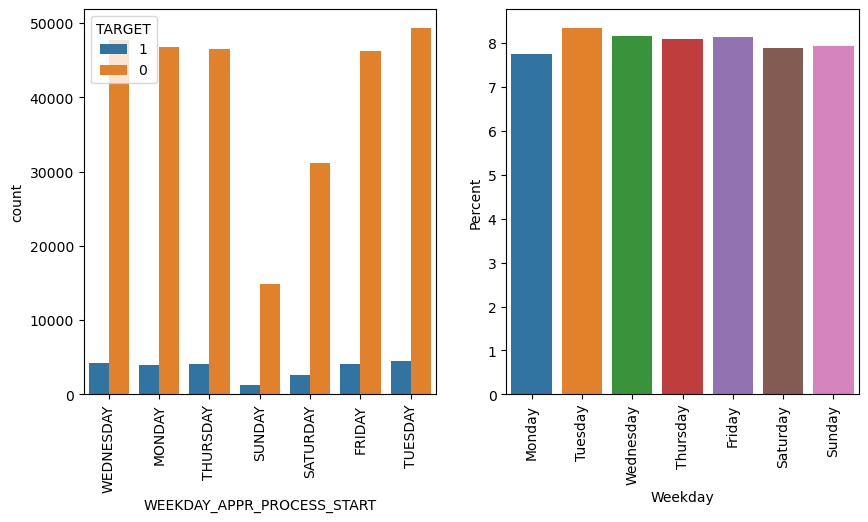

In [131]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='WEEKDAY_APPR_PROCESS_START',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=data_pct_weekday,x='Weekday',y='Percent')
plt.xticks(rotation=90)

plt.show()

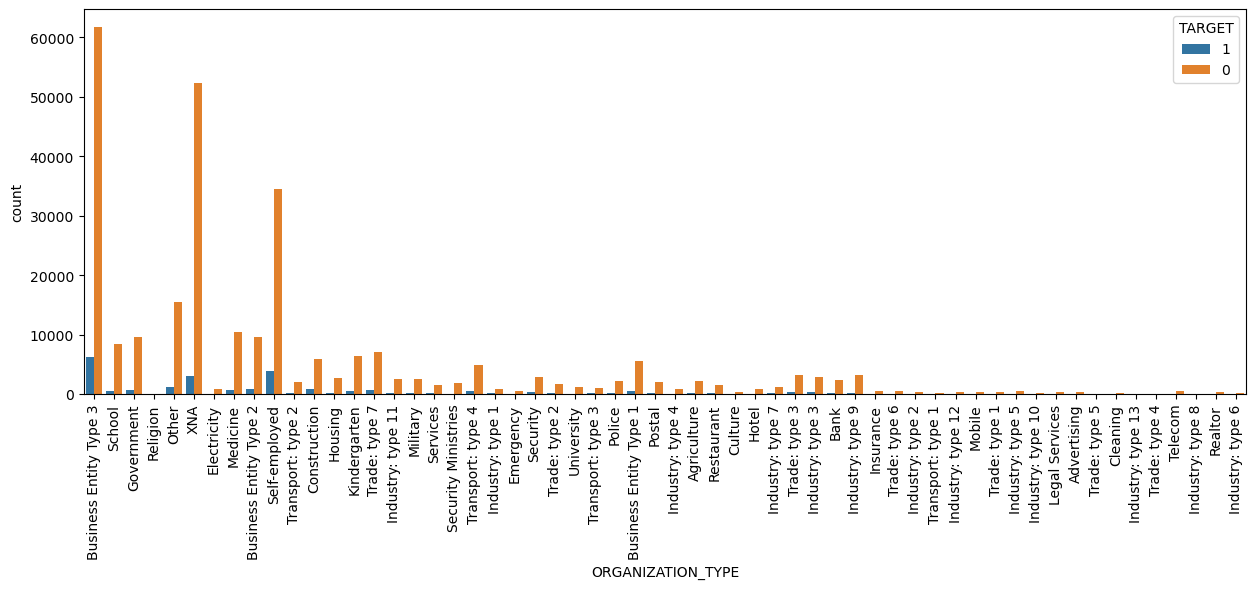

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(data=app_score_col_rmvd,x='ORGANIZATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [133]:
app_score_col_rmvd.groupby('ORGANIZATION_TYPE').size()

ORGANIZATION_TYPE
Advertising                 429
Agriculture                2454
Bank                       2507
Business Entity Type 1     5984
Business Entity Type 2    10553
Business Entity Type 3    67992
Cleaning                    260
Construction               6721
Culture                     379
Electricity                 950
Emergency                   560
Government                10404
Hotel                       966
Housing                    2958
Industry: type 1           1039
Industry: type 10           109
Industry: type 11          2704
Industry: type 12           369
Industry: type 13            67
Industry: type 2            458
Industry: type 3           3278
Industry: type 4            877
Industry: type 5            599
Industry: type 6            112
Industry: type 7           1307
Industry: type 8             24
Industry: type 9           3368
Insurance                   597
Kindergarten               6880
Legal Services              305
Medicine              

In [134]:
total_b=(app_score_col_rmvd['ORGANIZATION_TYPE'] == 'Business Entity Type 3').sum()
total_x=(app_score_col_rmvd['ORGANIZATION_TYPE'] == 'XNA').sum()
total_s=(app_score_col_rmvd['ORGANIZATION_TYPE'] == 'Self-employed').sum()
total_o=(app_score_col_rmvd['ORGANIZATION_TYPE'] == 'Other').sum()

count_b = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['ORGANIZATION_TYPE'] == 'Business Entity Type 3')).sum()
count_x = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['ORGANIZATION_TYPE'] == 'XNA')).sum()
count_s = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['ORGANIZATION_TYPE'] == 'Self-employed')).sum()
count_o = ((app_score_col_rmvd['TARGET'] == '1') & (app_score_col_rmvd['ORGANIZATION_TYPE'] == 'Other')).sum()

data_pct_organization = pd.DataFrame({'Organization Type': ['Business Entity Type 3', 'XNA','Self-employed','Other'],
                         'Default Count': [count_b,count_x,count_s,count_o],
                        'Percent':[count_b/total_b*100,count_x/total_x*100,count_s/total_s*100,count_o/total_o*100]})
data_pct_organization

,Organization Type,Default Count,Percent
0,Business Entity Type 3,6323,9.299623
1,XNA,2990,5.399646
2,Self-employed,3908,10.173904
3,Other,1275,7.642510


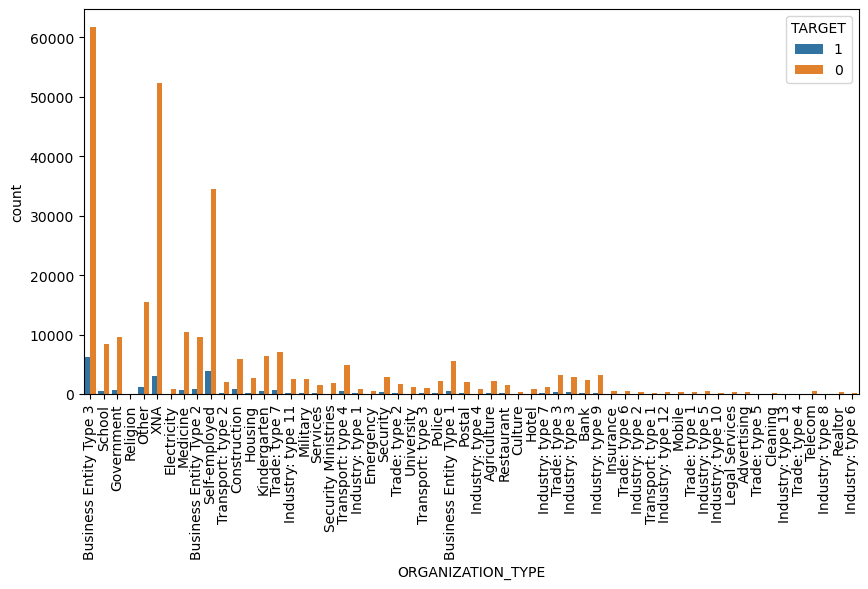

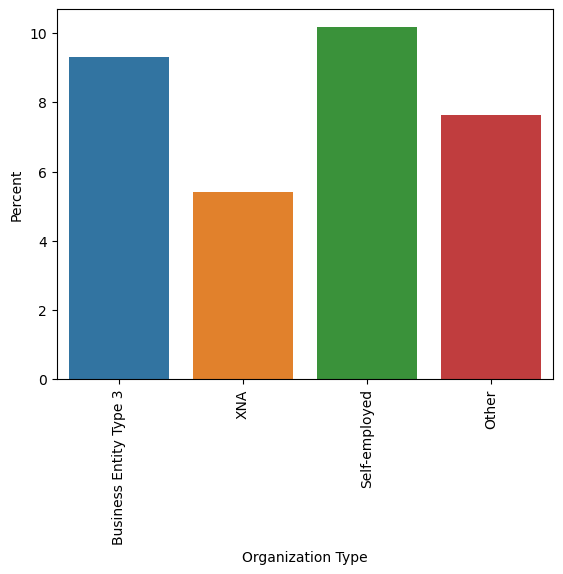

In [135]:
plt.figure(figsize=(10,5))


sns.countplot(data=app_score_col_rmvd,x='ORGANIZATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=data_pct_organization,x='Organization Type',y='Percent')
plt.xticks(rotation=90)

plt.show()

Others, Buisness entity type 3, self employed are good to go with a default rate around 10%.

In [136]:
app_score_col_rmvd['TARGET'] = pd.to_numeric(app_score_col_rmvd['TARGET'], errors='coerce')

In [137]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [138]:
num_var = app_score_col_rmvd.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

33

In [139]:
num_data = app_score_col_rmvd[num_var]
defaulters = num_data[num_data['TARGET']==1].drop(['TARGET'],axis=1)
repayers = num_data[num_data['TARGET']==0].drop(['TARGET'],axis=1)
repayers.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [140]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [141]:
pip install --upgrade numpy pandas seaborn matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [145]:
defaulter_corr = defaulters.corr()
defaulter_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,-0.009395,-0.005549,-0.009058,-0.009428,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,0.025804,0.001448,0.025180,-0.005106,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.004709,-0.005186,-0.004616,-0.004866,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.019098,-0.025979,0.019487,-0.030880,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.004463,-0.022394,0.005500,-0.027495,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,-0.001814,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,0.056061,0.047367,-0.066367,-0.077170,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.019892,-0.021781,0.020366,-0.026175,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811
REGION_POPULATION_RELATIVE,0.006301,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.006224,0.025865,0.006793,0.018231,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,0.001254,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,0.252863,-0.203267,-0.033928,-0.033631,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.005164,-0.004946,0.005391,-0.004001,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,-0.005161,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,0.229090,-0.186515,0.003490,0.002888,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,-0.008019,0.003191,-0.008305,0.005391,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812
DAYS_REGISTRATION,-0.006342,-0.149154,-0.000158,0.025854,-0.034279,0.025661,0.056222,0.289114,0.192455,1.000000,0.096833,-0.145828,-0.103855,-0.100285,0.032518,-0.020403,-0.021183,-0.015547,-0.048585,-0.088427,-0.062636,-0.014104,-0.010299,-0.014522,-0.009157,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572


In [146]:
repayers_corr = repayers.corr()
repayers_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000068,-0.000235,0.000360,0.001346,0.001744,0.001475,0.000077,-0.002789,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,-0.000695,0.000556,-0.000741,0.002382,0.000998,-0.001774,-0.001626,0.002298,-0.000037,0.000963,0.003852
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020905,-0.000559,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,0.014471,-0.002246,0.014137,-0.002172,0.008501,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.035861
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418949,0.349426,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.034254,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,-0.027828,-0.027621,-0.027690,-0.027593,0.041338,0.002707,0.008029,0.008647,0.058682,0.017676,0.034384
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771297,0.987022,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,-0.000914,-0.019851,-0.000892,-0.022225,0.069540,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.037519
AMT_ANNUITY,0.000068,0.020905,0.418949,0.771297,1.000000,0.776421,0.120983,-0.012262,-0.104978,-0.039434,-0.014113,0.075786,-0.132124,-0.145149,0.053588,0.041987,0.080654,0.075474,-0.005674,0.001519,0.010581,-0.013091,-0.022535,-0.012893,-0.023385,0.062012,0.003220,0.002464,0.012384,0.036293,0.011660,-0.008009
AMT_GOODS_PRICE,-0.000235,-0.000559,0.349426,0.987022,0.776421,1.000000,0.103826,0.044650,-0.068527,-0.015891,0.003677,0.062763,-0.104356,-0.112579,0.062710,0.026738,0.054889,0.054371,-0.024879,-0.016761,0.001285,-0.000688,-0.021010,-0.000704,-0.023159,0.071361,-0.001698,0.005520,0.001192,0.056675,0.022134,-0.039762
REGION_POPULATION_RELATIVE,0.000360,-0.024363,0.167851,0.100604,0.120983,0.103826,1.000000,0.025244,-0.007198,0.052083,0.001071,-0.023425,-0.539005,-0.537301,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,-0.012107,0.005941,-0.011591,0.002255,0.041164,-0.002334,0.001629,-0.002814,0.071495,-0.001954,0.000152
DAYS_BIRTH,0.001346,-0.336966,-0.062609,0.047378,-0.012262,0.044650,0.025244,1.000000,0.626114,0.333151,0.271314,-0.285823,-0.002332,-0.000780,-0.095916,-0.066252,-0.097908,-0.071648,-0.179772,-0.241904,-0.160072,-0.007726,0.003057,-0.007316,0.000990,0.076510,-0.002926,-0.001587,0.003570,0.001871,0.015427,0.073352
DAYS_EMPLOYED,0.001744,-0.245174,-0.140392,-0.070104,-0.104978,-0.068527,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.238300,0.038328,0.040461,-0.095455,-0.037502,-0.111011,-0.098920,-0.092842,-0.258121,-0.221387,0.007272,0.019379,0.007453,0.016383,-0.023379,-0.004292,-0.000932,0.001741,-0.032821,0.013322,0.046890
DAYS_REGISTRATION,0.001475,-0.185792,-0.064937,-0.013477,-0.039434,-0.015891,0.052083,0.333151,0.214511,1.000000,0.100236,-0.175629,-0.075846,-0.069357,0.008044,-0.028700,-0.037870,-0.028475,-0.064216,-0.098919,-0.072248,-0.008315,-0.001213,-0.008247,-0.002652,0.053533,0.002514,0.000009,0.001268,0.010877,0.000363,0.024278


In [147]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

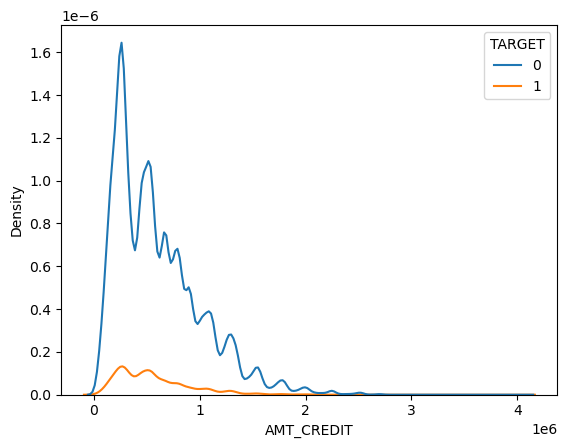

In [149]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

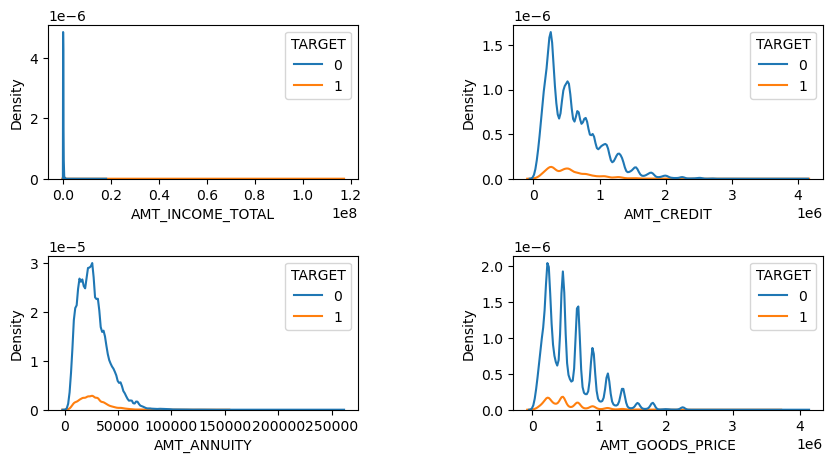

In [151]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

Most of the loans were given for the goods price ranging between 0 to 1 million.

Most of the loans were given for the credit amount of 0 to 1 million.

Most of the customers are paying annuity of 0 to 50k.

Mostly the customers have income between 0 to 1 million.

In [152]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

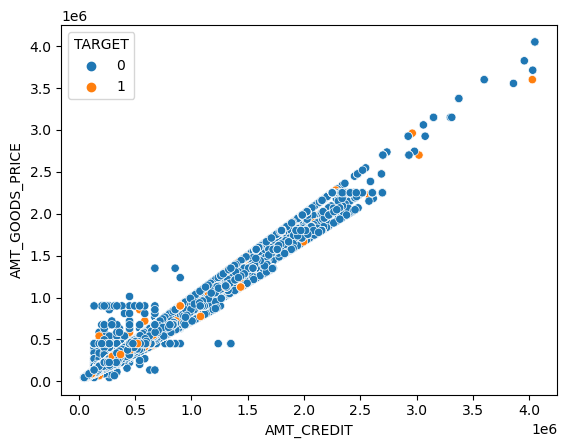

In [154]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

AMT_CREDIT and AMT_GOODS_PRICE are linearly correlated.

If the AMT_CREDIT increases the defaulters are decreasing.

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

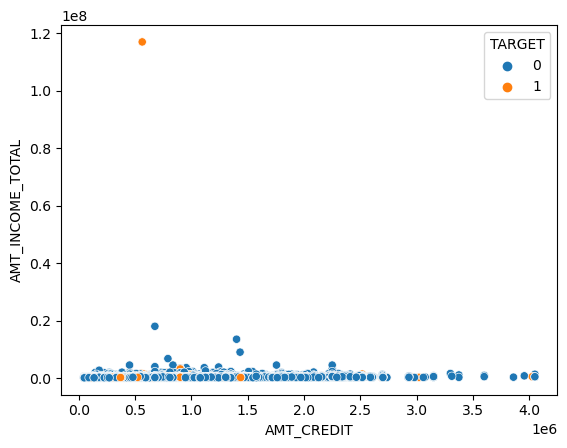

In [155]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

People having income less than or equal to 1 million are most likely to take loan out of which who are taking loan less than 1.5 million could turn out to be defaulter.

Thus we can target income below 1 million and loan amount greater than 1.5 million.

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

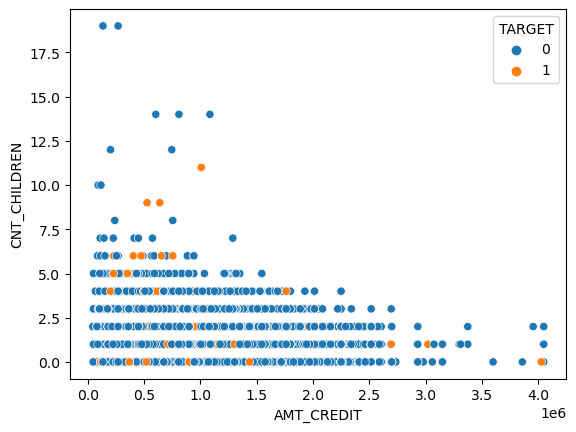

In [156]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

People having children 1 to less than 5 are safer to give the loan.

In [157]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

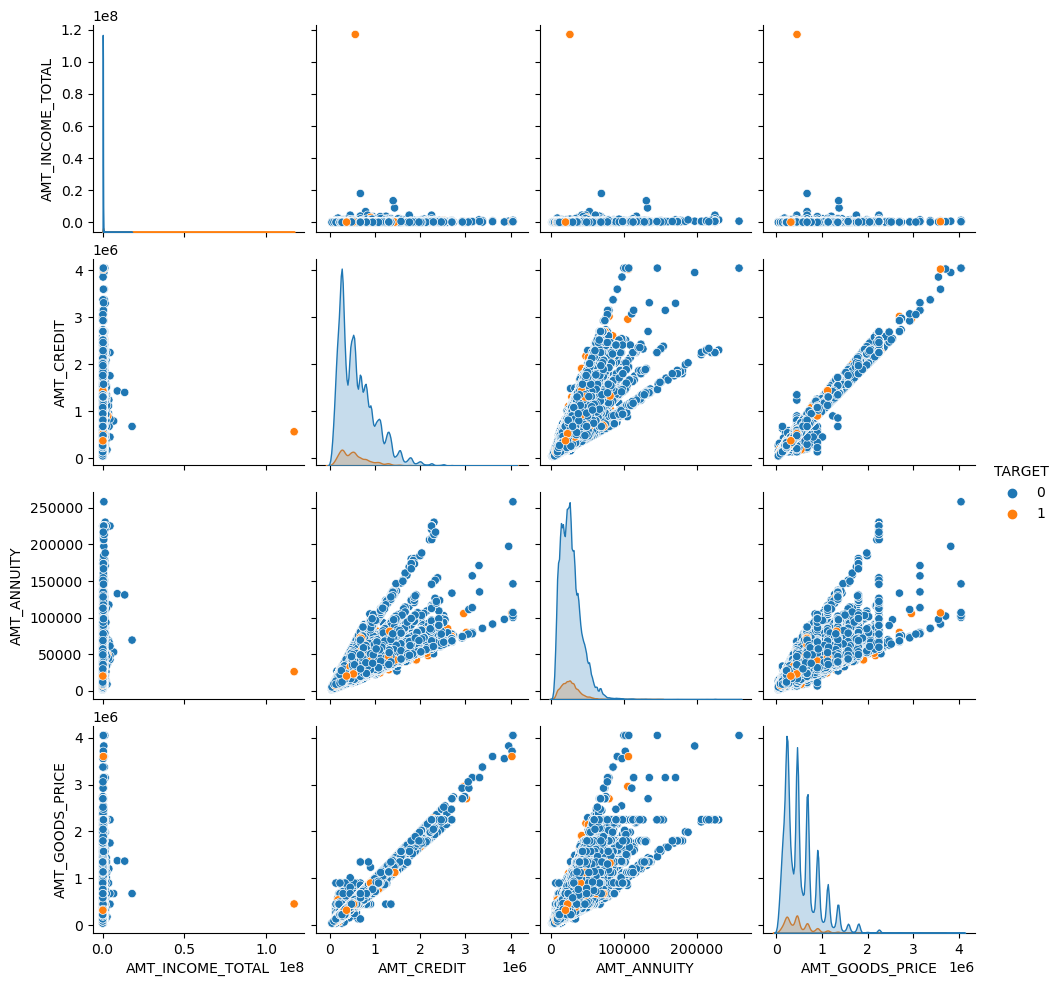

In [159]:
sns.pairplot(data=amt_var,hue='TARGET')

People who can pay the annuity of 100K are more likely to get loan and that loan is upto less than 2 million.(safer segment)

In [163]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
print(null_count)
print(var_msng_ge_40)

                            var  count_pct
0      RATE_INTEREST_PRIVILEGED  99.643698
1         RATE_INTEREST_PRIMARY  99.643698
2              AMT_DOWN_PAYMENT  53.636480
3             RATE_DOWN_PAYMENT  53.636480
4               NAME_TYPE_SUITE  49.119754
5     NFLAG_INSURED_ON_APPROVAL  40.298129
6              DAYS_TERMINATION  40.298129
7                 DAYS_LAST_DUE  40.298129
8     DAYS_LAST_DUE_1ST_VERSION  40.298129
9                DAYS_FIRST_DUE  40.298129
10           DAYS_FIRST_DRAWING  40.298129
11              AMT_GOODS_PRICE  23.081773
12                  AMT_ANNUITY  22.286665
13                  CNT_PAYMENT  22.286366
14          PRODUCT_COMBINATION   0.020716
15                   AMT_CREDIT   0.000060
16             NAME_YIELD_GROUP   0.000000
17               NAME_PORTFOLIO   0.000000
18         NAME_SELLER_INDUSTRY   0.000000
19             SELLERPLACE_AREA   0.000000
20                 CHANNEL_TYPE   0.000000
21            NAME_PRODUCT_TYPE   0.000000
22         

In [161]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [164]:
len(prev_app.columns)

37

In [165]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)

In [166]:
len(prev_app_nva_col_rmvd.columns)

22

In [167]:
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [168]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [169]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [170]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [171]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [172]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())

In [173]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])

In [174]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

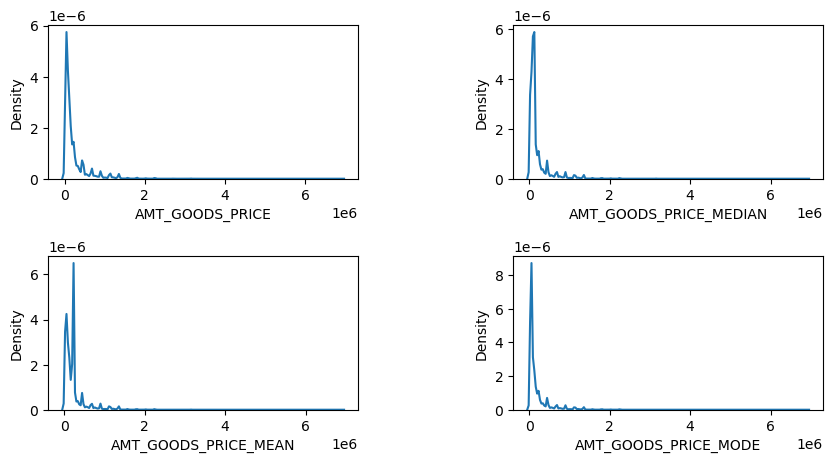

In [175]:
plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [176]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [177]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [178]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [179]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())

In [180]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])

In [181]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [182]:
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [184]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [185]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [186]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [187]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [188]:
len(prev_app_nva_col_rmvd.columns)

22

In [189]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [190]:
merged_df = pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300K-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


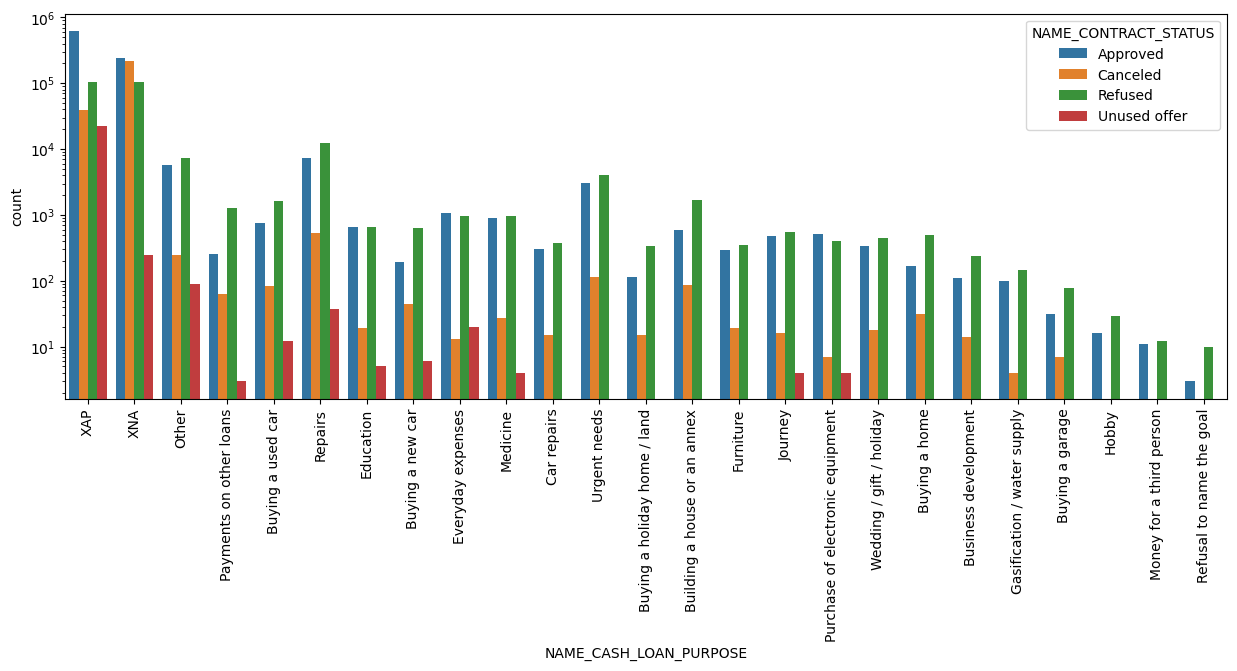

In [191]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')


For repairing purpose customers have mostly applied previously and for the same purpose has the most no. of cancilations.

In [197]:
merged_df['TARGET'] = merged_df['TARGET'].astype(str)

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

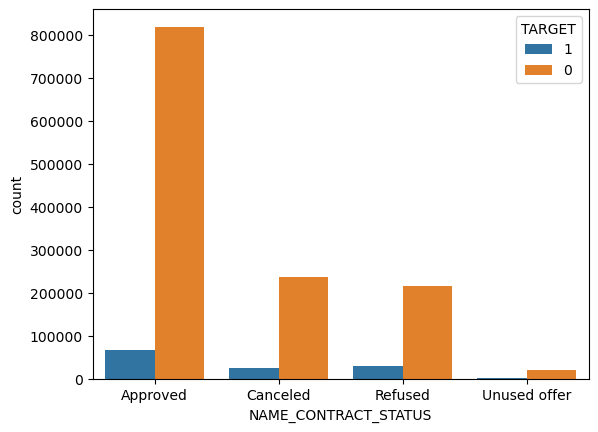

In [198]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

Most od the applications which were previously either cancelled or refused 80-90% of them are in repayer in the current data.

In [199]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


C:\Users\harsh\AppData\Local\Temp\ipykernel_9888\563267390.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

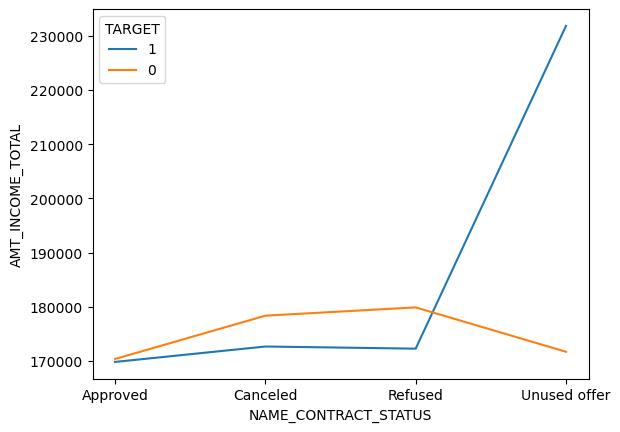

In [200]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

Previously offers which were unused now have max no. of defaulters despite having more no. of income range.

## Conclusion/Insignts


1.Most of the customers have taken cash loan.

2.Customers who have taken cash loans are less likely to default.

3.CODE_GENDER 

    - Most of the loans have been taken by female.
    - Default rate for females are just ~7% which is safer and lesser than male.
    
4.NAME_TYPE_SUITE

    - Unacompanied people had taken most of the loans and the default rate is ~8.5% which is still okay.
    
5.NAME_INCOME_TYPE

    - The safest segments are working, commercial associates and pensioners.

6.NAME_EDUCATION_TYPE

     - Higher education is the safest segment to give the loan with a default rate of less than 5%.

7.NAME_FAMILY_STATUS

     - Married people are safe to target, default rate is 8%

8.NAME_HOUSING_TYPE

     - People having house/appartment are safe to give the loan with default rate of ~8%

9.OCCUPATION_TYPE

     - Drivers are highest defaulters.There may be more default rated occupations but we have considered the occupation that has maximum no.of loans           taken. 
     - Accountants are less defaulters
     - Core staff, Managers and Laborers are safer to target with a default rate of <=10%

10.ORGANIZATION_TYPE

     - Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 %


#### Univariate numeric variables analysis
      
      - Most of the loans were given for the goods price ranging between 0 to 1 ml.
      - Most of the loans were given for the credit amount of 0 to 1 ml.
      - Most of the customers are paying annuity of 0 to 50 K.
      - Mostly the customers have income between 0 to 1 ml.

#### Bivariate Analysis

      - AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing.
      - People having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, 
        could turn out to be defaulters. we can target income below 1 million and loan maount greater than 1.5 million.
      - People having children 1 to less than 5 are safer to give the loan.
      - People who can pay the annuity of 100K are more like to get the loan and that's upto less than 2ml (safer segment).

#### Analysis on merged data

      - For the repairing purpose customers had applied mostly prev. and the same puspose has most number of cancelations.
      - Most of the app. which were prev. either canceled or refused 80-90% of them are repayer in the current data.
      - Offers which were unused prev. now have maximum number of defaulters despite of having high income band customers.


### Bank should target the customers

      - Having low income i.e. below 1 ml.
      - Working in Others, Business Entity Type 3, Self Employed  org. type.
      - Working as Accountants, Core staff, Managers and Laborers.
      - Having house/appartment and are married and having children not more than 5.
      - Highly educated.
      - Preferably female.
      - Unacompanied people can be safer -  default rate is ~8.5%.

### Amount segment recommendation

      - The credit amount should not be more than 1 ml.
      - Annuity can be made of 50K (depending on the eligibility).
      - Income bracket could be below 1 ml.
      - 80-90% of the customer who were prev. canceled/refused, are repayers. Bank can do the analysis and can consider to give loan to these segments.

